In [1]:
import pandas as pd
#import seaborn as sns
import numpy as np
import matplotlib.pyplot as plt
from datetime import datetime
from tqdm import tqdm

df = pd.read_csv('winemag-data-130k-v2.csv')
# 将未命名的第一列重命名为 index
df.rename(columns={'Unnamed: 0':'index'}, inplace=True)

#展示数据的格式
df.head(2)

,index,country,description,designation,points,price,province,region_1,region_2,taster_name,taster_twitter_handle,title,variety,winery
0,0,Italy,"Aromas include tropical fruit, broom, brimston...",Vulkà Bianco,87,NaN,Sicily & Sardinia,Etna,NaN,Kerin O’Keefe,@kerinokeefe,Nicosia 2013 Vulkà Bianco (Etna),White Blend,Nicosia
1,1,Portugal,"This is ripe and fruity, a wine that is smooth...",Avidagos,87,15.0,Douro,NaN,NaN,Roger Voss,@vossroger,Quinta dos Avidagos 2011 Avidagos Red (Douro),Portuguese Red,Quinta dos Avidagos


## 1. 数据摘要
### 1.1 数据属性

In [2]:
# 观察数据的属性
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 129971 entries, 0 to 129970
Data columns (total 14 columns):
 #   Column                 Non-Null Count   Dtype  
---  ------                 --------------   -----  
 0   index                  129971 non-null  int64  
 1   country                129908 non-null  object 
 2   description            129971 non-null  object 
 3   designation            92506 non-null   object 
 4   points                 129971 non-null  int64  
 5   price                  120975 non-null  float64
 6   province               129908 non-null  object 
 7   region_1               108724 non-null  object 
 8   region_2               50511 non-null   object 
 9   taster_name            103727 non-null  object 
 10  taster_twitter_handle  98758 non-null   object 
 11  title                  129971 non-null  object 
 12  variety                129970 non-null  object 
 13  winery                 129971 non-null  object 
dtypes: float64(1), int64(2), object(11)


#### 整个数据有13列 其中 index，points，price为数值属性，其余为标称属性
其中每一种属性代表的意义如下：
1. country:来自哪个国家
2. description：品酒师对其的描述
3. designation：酿酒用的葡萄来自哪个葡萄庄园
4. points：品酒师对其的打分
5. price：一瓶酒的价格
6. province：来自哪个省份或者州
7. region_1：省内的具体地区
8. region_2：有时候存在着更具体的地址
9. taster_name： 品酒师的姓名
10. taster_twitter_handle： 品酒师的推特账号
11. title： 评论的标题
12. variety:用于酿酒的葡萄种类
13. winery：酿酒厂的名字

### 1.2 数值属性缺失值个数

In [3]:
# 统计每一列（每一种属性）值为空的个数
df.isna().sum()

index                        0
country                     63
description                  0
designation              37465
points                       0
price                     8996
province                    63
region_1                 21247
region_2                 79460
taster_name              26244
taster_twitter_handle    31213
title                        0
variety                      1
winery                       0
dtype: int64

###  1.3 数值属性五数描述

In [4]:
# 获取数值属性的数据统计信息，包含五数描述
df.describe()

,index,points,price
count,129971.000000,129971.000000,120975.000000
mean,64985.000000,88.447138,35.363389
std,37519.540256,3.039730,41.022218
min,0.000000,80.000000,4.000000
25%,32492.500000,86.000000,17.000000
50%,64985.000000,88.000000,25.000000
75%,97477.500000,91.000000,42.000000
max,129970.000000,100.000000,3300.000000


### 1.4 标称属性每种类别的频数
#### 由于总共有11种标称属性，每一种标称属性都有很多值，因此这里只展示每一个标称属性中出现频数最高的5个值。

In [5]:
#国家属性中每种类别出现的频数
df['country'].value_counts().head(5)

US          54504
France      22093
Italy       19540
Spain        6645
Portugal     5691
Name: country, dtype: int64

In [6]:
#评价属性中每种类别出现的频数
df['description'].value_counts().head(5)

Seductively tart in lemon pith, cranberry and pomegranate, this refreshing, light-bodied quaff is infinitely enjoyable, both on its own or at the table. It continues to expand on the palate into an increasing array of fresh flavors, finishing in cherry and orange.                                         3
Cigar box, café au lait, and dried tobacco aromas are followed by coffee and cherry flavors, with barrel spices lingering on the finish. The wood gets a bit out front but it still delivers enjoyment.                                                                                                          3
Gravenstein apple, honeysuckle and jasmine aromas show on the relatively boisterous nose of this bottling from a large vineyard on Highway 46 east of Paso Robles. There is compellingly grippy texture to the sip, with ripe flavors of pear and honeydew melon. A salty acidity takes it to the next level.    3
Stalky aromas suggest hay and green herbs, with raspberry in the backdrop. It's

In [7]:
#葡萄园属性中每种类别出现的频数
df['designation'].value_counts().head(5)


Reserve         2009
Estate          1322
Reserva         1259
Riserva          698
Estate Grown     621
Name: designation, dtype: int64

In [8]:
#生产省份属性中每种类别出现的频数
df['province'].value_counts().head(5)

California    36247
Washington     8639
Bordeaux       5941
Tuscany        5897
Oregon         5373
Name: province, dtype: int64

In [9]:
#生产省份下一级地址属性中每种类别出现的频数
df['region_1'].value_counts().head(5)

Napa Valley             4480
Columbia Valley (WA)    4124
Russian River Valley    3091
California              2629
Paso Robles             2350
Name: region_1, dtype: int64

In [10]:
#生产省份下二级地址属性中每种类别出现的频数
df['region_2'].value_counts().head(5)

Central Coast        11065
Sonoma                9028
Columbia Valley       8103
Napa                  6814
Willamette Valley     3423
Name: region_2, dtype: int64

In [11]:
#品酒师姓名中每种类别出现的频数
df['taster_name'].value_counts().head(5)

Roger Voss           25514
Michael Schachner    15134
Kerin O’Keefe        10776
Virginie Boone        9537
Paul Gregutt          9532
Name: taster_name, dtype: int64

In [12]:
#品酒师推特账号中每种类别出现的频数
df['taster_twitter_handle'].value_counts().head(5)

@vossroger      25514
@wineschach     15134
@kerinokeefe    10776
@vboone          9537
@paulgwine       9532
Name: taster_twitter_handle, dtype: int64

In [13]:
#评价标题中每种类别出现的频数
df['title'].value_counts().head(5)

Gloria Ferrer NV Sonoma Brut Sparkling (Sonoma County)     11
Korbel NV Brut Sparkling (California)                       9
Segura Viudas NV Extra Dry Sparkling (Cava)                 8
Gloria Ferrer NV Blanc de Noirs Sparkling (Carneros)        7
Segura Viudas NV Aria Estate Extra Dry Sparkling (Cava)     7
Name: title, dtype: int64

In [14]:
#葡萄种类中每种类别出现的频数
df['variety'].value_counts().head(5)

Pinot Noir                  13272
Chardonnay                  11753
Cabernet Sauvignon           9472
Red Blend                    8946
Bordeaux-style Red Blend     6915
Name: variety, dtype: int64

In [15]:
##葡萄酒庄中每种类别出现的频数
df['winery'].value_counts().head(5)

Wines & Winemakers    222
Testarossa            218
DFJ Vinhos            215
Williams Selyem       211
Louis Latour          199
Name: winery, dtype: int64

### 1.5 数据可视化
#### 在13维的特征中，其中10维为标称属性，另外3维为数值属性。
#### 除去数值属性中的index索引，将剩余2维数值属性做直方图和盒图观察其数据分布以及离群点。

array([[<AxesSubplot:title={'center':'points'}>,
        <AxesSubplot:title={'center':'price'}>]], dtype=object)

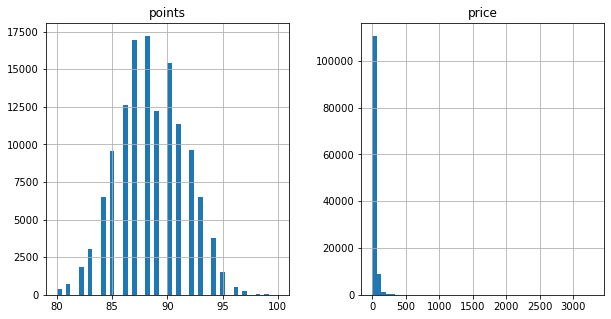

In [16]:
#得分和价格的数据分布
#df['points'].plot.hist(bins=20)
df1 = df[['points','price']]
df1.hist(figsize=(10,5),bins=50)

#### 从统计直方图来看，酒的得分呈现正态分布，普遍位于80-98分的得分区间。而酒的价格呈现幂律分布集中在0-250这个区间，但也存在着价格为500-3000区间的酒，只是数量相较于普通酒很少。

points       AxesSubplot(0.125,0.125;0.352273x0.755)
price     AxesSubplot(0.547727,0.125;0.352273x0.755)
dtype: object

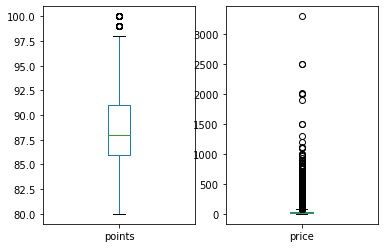

In [17]:
#得分和价格的盒图
df1.plot.box(subplots=True)

#### 得分：绝大部分酒的得分位于80-98分之间，98分之上有两个离群点，说明绝大多数酒的评分差距不大。
#### 价格：存在着很多的离群点，这些离群点代表价格远超一般酒价格的酒，说明存在一些酒比大部分酒价格高很多。

#### 作10维标称bar图，观察其中每种类别的频数。

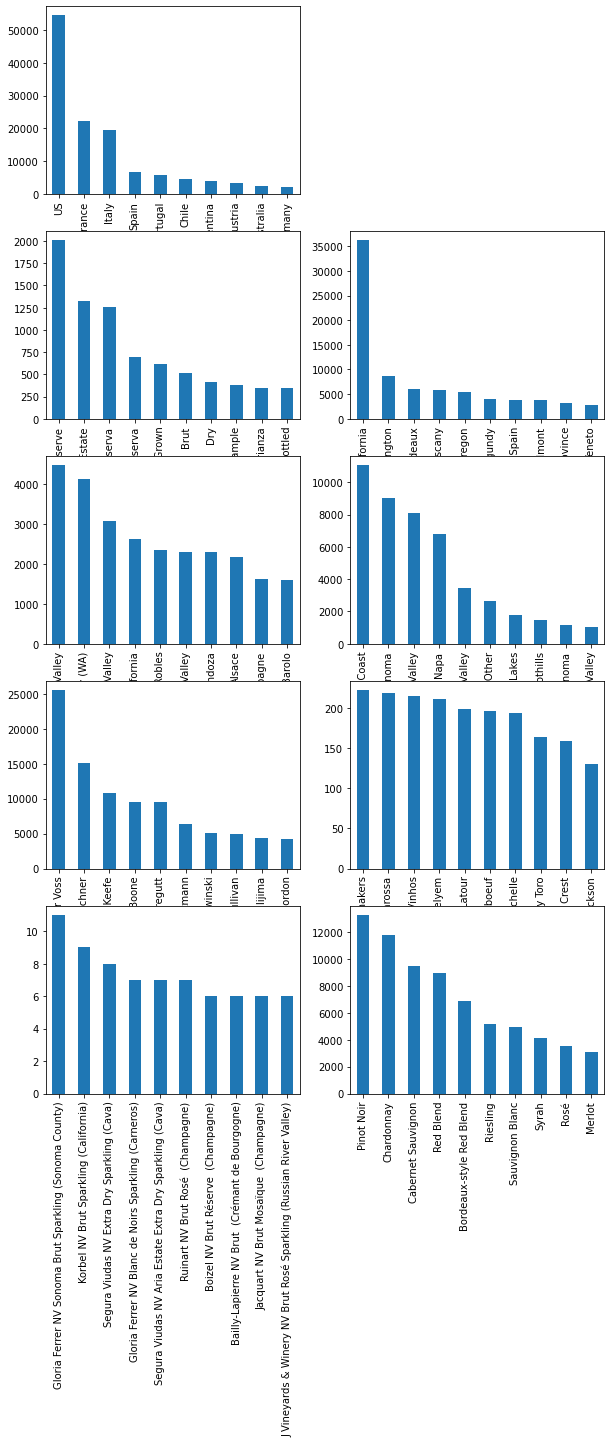

In [18]:
#标称属性的饼状图
fig=plt.figure(10,figsize=(10,20))##增添画布，必须要有这一步
fig.set(alpha=0.2)
ax1=fig.add_subplot(5,2,1)  ##切割画布，并且定位画布到1行4列的第一个.plot(kind='bar', label="female highclass", color='#FA2479')
df['country'].value_counts().head(10).plot(kind='bar')

#标签太长无法显示
# ax2=fig.add_subplot(5,2,2)
# df['description'].value_counts().head(10).plot(kind='bar')

ax3=fig.add_subplot(5,2,3)
df['designation'].value_counts().head(10).plot(kind='bar')

ax4=fig.add_subplot(5,2,4)
df['province'].value_counts().head(10).plot(kind='bar')

ax5=fig.add_subplot(5,2,5)
df['region_1'].value_counts().head(10).plot(kind='bar')

ax6=fig.add_subplot(5,2,6)
df['region_2'].value_counts().head(10).plot(kind='bar')

ax7=fig.add_subplot(5,2,7)
df['taster_name'].value_counts().head(10).plot(kind='bar')

ax8=fig.add_subplot(5,2,8)
df['winery'].value_counts().head(10).plot(kind='bar')

ax9=fig.add_subplot(5,2,9)
df['title'].value_counts().head(10).plot(kind='bar')

ax10=fig.add_subplot(5,2,10)
df['variety'].value_counts().head(10).plot(kind='bar')

plt.show()

## 2. 数据缺失处理
### 2.1观察缺失数据，分析缺失原因。

In [19]:
#检查每一列缺失值的个数
df.isna().sum()

index                        0
country                     63
description                  0
designation              37465
points                       0
price                     8996
province                    63
region_1                 21247
region_2                 79460
taster_name              26244
taster_twitter_handle    31213
title                        0
variety                      1
winery                       0
dtype: int64

#### 数据中country和province这两个属性都是63次缺失，查看原数据集可以发现country和province两者是同时缺失的，同时后面的region_1,region_2也是缺失的，这说明数据统计时，存在着漏统计的现象。
#### designation，price，region_1,region_2,taster_name,taster_twit ter_handle存在着大量的缺失数据，说明这一字段可能设置为缺省值，在统计时是不是必要字段。
#### varety字段只存1个缺失值，可能是数据发生了丢失。

### 2.2 将缺失部分剔除

In [20]:
df_drop = df.dropna()
#删除前数值属性数据描述
df_drop.describe()

,index,points,price
count,22387.000000,22387.000000,22387.000000
mean,65656.944745,89.537812,41.465404
std,37566.725499,2.809306,29.379374
min,4.000000,80.000000,4.000000
25%,33404.000000,88.000000,25.000000
50%,66312.000000,90.000000,36.000000
75%,98460.500000,92.000000,50.000000
max,129950.000000,100.000000,2013.000000


In [21]:
#删除后数值属性
df_drop = df_drop.rename(columns={'points':'drop_points'})

#### 删除含有缺失值的行后，总的记录条数从129971条降至22387条，对比将缺失值删除前后的数值属性数值分布：

<AxesSubplot:ylabel='Frequency'>

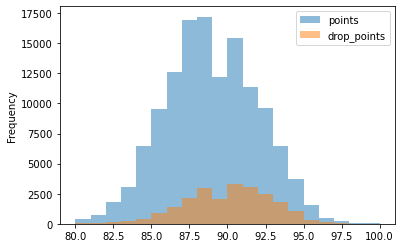

In [22]:
frames = [df['points'],df_drop['drop_points']]
result = pd.concat(frames, axis=1)

result.plot.hist(alpha=0.5,bins=20)

#### 上图为删除空缺值前后的points数据分布对比，可以看出删除空缺值后，记录数量明显变少，并且整体向右移动。

### 2.3 用最高频率值来填补缺失值

In [23]:
#利用每一列最多的值来填充每一列中的空缺值。
value={'country':df.country.mode(), 'designation':df.designation.mode(),'price':df.price.mode(),'province':df.province.mode(), 'region_1':df.region_1.mode(),'region_2':df.region_2.mode(),'taster_name':df.taster_name.mode(),'taster_twitter_handle':df.taster_twitter_handle.mode(),'variety':df.variety.mode()} #分别计算均值个中位数 auto.fillna(value)
df_fill_mode = df.fillna(value)
value

{'country': 0    US
 dtype: object,
 'designation': 0    Reserve
 dtype: object,
 'price': 0    20.0
 dtype: float64,
 'province': 0    California
 dtype: object,
 'region_1': 0    Napa Valley
 dtype: object,
 'region_2': 0    Central Coast
 dtype: object,
 'taster_name': 0    Roger Voss
 dtype: object,
 'taster_twitter_handle': 0    @vossroger
 dtype: object,
 'variety': 0    Pinot Noir
 dtype: object}

### 2.4 通过属性的相关关系来填补缺失值
#### 由于省市必须位于特定的国家里面，所以不能简单的选取出现最多的省份进行填充，而应该考虑所处的国家。

In [24]:
#
provinces = df.groupby(['country','province']).agg({'index':'count'}).reset_index()
provinces.head(20)

,country,province,index
0,Argentina,Mendoza Province,3264
1,Argentina,Other,536
2,Armenia,Armenia,2
3,Australia,Australia Other,245
4,Australia,New South Wales,85
5,Australia,South Australia,1349
6,Australia,Tasmania,42
7,Australia,Victoria,322
8,Australia,Western Australia,286
9,Austria,Austria,26


In [25]:
#获取每个国家下最长出现的省份
def get_most_pattern(x):
    df = x.sort_values(by="index",ascending=True)
    return df.iloc[-1,:]

provinces_most =provinces.groupby('country',as_index=False).apply(get_most_pattern)

In [26]:
#首先对一般属性使用出现频数最大的值进行填充
value={'country':df.country.mode(), 'designation':df.designation.mode(),'price':df.price.mode(),'taster_name':df.taster_name.mode(),'taster_twitter_handle':df.taster_twitter_handle.mode(),'variety':df.variety.mode()} #分别计算均值个中位数 auto.fillna(value)
df_fill_relation = df.fillna(value)
#生成一列most_province对缺失的province进行填充

def most_province(x,provinces_most):
    if x['country'] in provinces_most['country'].values:
        
        res = provinces_most[provinces_most['country'].values== x['country']]
#         print(res["province"])
        return res["province"].values[0]
        #return provinces_most.loc[provinces_most["country"] == x["country"]].head(1)["province"]
    else:
        return x['country']

df_fill_relation['most_province'] = df_fill_relation.apply(lambda x: most_province(x,provinces_most),axis=1)


#### 最后一列为新增加的most_province属性，该列的值是由国家确定的，大小为该国家下面最多出现的省份。

In [27]:
#使用最后一列填充空缺值
df_fill_relation['province'].fillna(df_fill_relation['most_province'])

0         Sicily & Sardinia
1                     Douro
2                    Oregon
3                  Michigan
4                    Oregon
                ...        
129966                Mosel
129967               Oregon
129968               Alsace
129969               Alsace
129970               Alsace
Name: province, Length: 129971, dtype: object

### 2.5 通过数据对象之间的相似性来填补缺失值

In [ ]:
#这里我们可以用得分的相似性来预测价格，即将空缺的价格填补为，得分最相近个数据价格的平均值。


# #首先对一般属性使用出现频数最大的值进行填充
value={'country':df.country.mode(), 'designation':df.designation.mode(),'taster_name':df.taster_name.mode(),'taster_twitter_handle':df.taster_twitter_handle.mode(),'variety':df.variety.mode()} #分别计算均值个中位数 auto.fillna(value)
df_fill_similarity = df.fillna(value)
# #生成一列most_province对缺失的province进行填充

# # #找出最相近的数据，并将其的价格返回
def most_similar(x,df):
    gap=100;
    similarlist=[];
    for item in  df['points'].values:
        if abs(x.points - item ) > gap:
            continue;
        elif abs(x.points - item ) < gap:
            gap = abs(x.points - item)
            similarlist.clear()
            similarlist.append(item)
        else:
            similarlist.append(item)
    similarset = set(similarlist)
    
    sumpoints = 0;
    sumlens = 0;
    
    for i in similarset:
        df1 = df[df['points']==i]
        sumpoints = sumpoints + df1['price'].sum()
        sumlens = sumlens + df1['index'].count()
        
    avgpoints = sumpoints/sumlens
    #print(avgpoints+'\n')
    return avgpoints

df_fill_similarity['similar_price'] = df_fill_similarity.apply(lambda x: most_similar(x,df),axis=1)

df_fill_similarity